# KMeans Hands-on for Cricket Dataset

### Import the basic libraries

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import json
data = json.loads()

### Import the dataset

In [57]:
df = pd.read_csv("Cricket.csv", encoding = 'latin1')
# Whatever dataset that we have, they are mostly made in excel or spreadsheet
# Whenever we work with a dataset that is made in some other format,
# then we apply encoding(utf,unicode,latin)

### Basic pandas methods


In [58]:
df.head()

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28


In [59]:
df.describe(include='all')

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
count,79,79,79.000000,79.000000,79.000000,79.000000,79,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
unique,79,65,NaN,NaN,NaN,NaN,62,NaN,NaN,NaN,NaN,NaN,NaN
top,SR Tendulkar (INDIA),1992-2003,NaN,NaN,NaN,NaN,119*,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,245.075949,230.544304,30.037975,7618.139241,NaN,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,NaN,NaN,74.211716,70.321022,14.421710,2551.873313,NaN,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,NaN,NaN,128.000000,127.000000,4.000000,5080.000000,NaN,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,NaN,NaN,188.000000,177.000000,17.500000,5759.000000,NaN,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,NaN,NaN,232.000000,217.000000,29.000000,6798.000000,NaN,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,NaN,NaN,281.500000,261.500000,40.000000,8739.500000,NaN,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000


In [60]:
# Player --> Names of the players
# Span --> From which year till which year the player played for the country
# Mat --> No. of matches played
# Inns --> In how many no. of matched the player has batted.
# NO --> No. of matches the player remained not out
# Runs --> Total no. of runs scored by the player(ODI)
# HS --> Highest score
# Ave --> The average score of the player per innings
# BF --> Total no. of balls the player has faced
# SR --> Strike Rate of the player
# 100 --> No. of centuries
# 50 --> No. of half-centuries
# 0 --> No. of times the player got out at 0.

In [61]:
df.shape

(79, 13)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 8.1+ KB


In [63]:
df.describe()

,Mat,Inns,NO,Runs,Ave,BF,SR,100,50,0
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,245.075949,230.544304,30.037975,7618.139241,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165
std,74.211716,70.321022,14.421710,2551.873313,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755
min,128.000000,127.000000,4.000000,5080.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000
25%,188.000000,177.000000,17.500000,5759.000000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000
50%,232.000000,217.000000,29.000000,6798.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000
75%,281.500000,261.500000,40.000000,8739.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000
max,463.000000,452.000000,70.000000,18426.000000,53.940000,21367.000000,117.000000,49.000000,96.000000,34.000000


In [64]:
df.isnull().sum() # Checking the null values

Player    0
Span      0
Mat       0
Inns      0
NO        0
Runs      0
HS        0
Ave       0
BF        0
SR        0
100       0
50        0
0         0
dtype: int64

In [65]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15


In [66]:
# to convert the span into years of experience
# we first split the span column into start and end and store in new column

In [67]:
d1 = df.copy()

In [68]:
d12 = df.Span.str.split("-",expand=False) 

In [69]:
d12

0     [1989, 2012]
1     [2000, 2015]
2     [1995, 2012]
3     [1989, 2011]
4     [1998, 2015]
          ...     
74    [1975, 1991]
75    [2002, 2015]
76    [2001, 2011]
77    [1998, 2009]
78    [1996, 2011]
Name: Span, Length: 79, dtype: object

In [70]:
df[['Start','End']] = df.Span.str.split("-",expand=True) 
# 1989-2012
# Start 1989
# End  2012 

In [71]:
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     object 
 14  End     79 non-null     object 
dtypes: float64(2), int64(8), object(5)
memory usage: 9.4+ KB


In [73]:
# Previously we made 2 more columns --> start, end
# Now we will be making one more column --> exp = end - start
# Now, how many no. of extra columns that we have created = 3
# convert them as int and
# find years of exp as end year - start year
# later drop the unneceassry columns such as start, end and span
# we are only left with the experience column now

In [74]:
a = '1989', b = '2012'
b-a

SyntaxError: cannot assign to literal (1445359415.py, line 1)

In [75]:
df[['Start','End']]=df[['Start','End']].astype(int) # values are being converted into integer

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Span    79 non-null     object 
 2   Mat     79 non-null     int64  
 3   Inns    79 non-null     int64  
 4   NO      79 non-null     int64  
 5   Runs    79 non-null     int64  
 6   HS      79 non-null     object 
 7   Ave     79 non-null     float64
 8   BF      79 non-null     int64  
 9   SR      79 non-null     float64
 10  100     79 non-null     int64  
 11  50      79 non-null     int64  
 12  0       79 non-null     int64  
 13  Start   79 non-null     int32  
 14  End     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(3)
memory usage: 8.8+ KB


In [77]:
df['Exp']=df['End']-df['Start']
df

,Player,Span,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Start,End,Exp
0,SR Tendulkar (INDIA),1989-2012,463,452,41,18426,200*,44.83,21367,86.23,49,96,20,1989,2012,23
1,KC Sangakkara (Asia/ICC/SL),2000-2015,404,380,41,14234,169,41.98,18048,78.86,25,93,15,2000,2015,15
2,RT Ponting (AUS/ICC),1995-2012,375,365,39,13704,164,42.03,17046,80.39,30,82,20,1995,2012,17
3,ST Jayasuriya (Asia/SL),1989-2011,445,433,18,13430,189,32.36,14725,91.20,28,68,34,1989,2011,22
4,DPMD Jayawardene (Asia/SL),1998-2015,448,418,39,12650,144,33.37,16020,78.96,19,77,28,1998,2015,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),1975-1991,128,127,13,5134,133*,45.03,7908,64.92,11,31,3,1975,1991,16
75,Misbah-ul-Haq (PAK),2002-2015,162,149,31,5122,96*,43.40,6945,73.75,0,42,6,2002,2015,13
76,PD Collingwood (ENG),2001-2011,197,181,37,5092,120*,35.36,6614,76.98,5,26,7,2001,2011,10
77,A Symonds (AUS),1998-2009,198,161,33,5088,156,39.75,5504,92.44,6,30,15,1998,2009,11


In [78]:
df = df.drop(['Start','End','Span'], axis = 1) 
# df.drop(['Start','End','Span'], axis = 1, inplace=True)
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200*,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [79]:
a = '200*'
int(a)

ValueError: invalid literal for int() with base 10: '200*'

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 7.8+ KB


In [81]:
# We cannot directly convert these string values into int, because of * present along with the values
df.HS=df.HS.str.extract('(\d+)') # Extracting only the numbers --> \d -> numbers, + --> ignore the *

In [82]:
a = '2,000'
int(a.replace(',', ''))

2000

In [83]:
a1 = '200*'
int(a1.replace('*',''))

200

In [84]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     object 
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(1), int64(8), object(2)
memory usage: 7.8+ KB


In [86]:
df.HS=df.HS.astype(int) # converting the dtype from string to int

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79 entries, 0 to 78
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  79 non-null     object 
 1   Mat     79 non-null     int64  
 2   Inns    79 non-null     int64  
 3   NO      79 non-null     int64  
 4   Runs    79 non-null     int64  
 5   HS      79 non-null     int32  
 6   Ave     79 non-null     float64
 7   BF      79 non-null     int64  
 8   SR      79 non-null     float64
 9   100     79 non-null     int64  
 10  50      79 non-null     int64  
 11  0       79 non-null     int64  
 12  Exp     79 non-null     int32  
dtypes: float64(2), int32(2), int64(8), object(1)
memory usage: 7.5+ KB


### Check for outliers

In [88]:
# Violin plot --> Combination of box plot and distribution

In [89]:
# col_name = list(df.columns)
# for i in col_name:
#       if df[i].dtype!='object':
#          sns.violinplot(y = df[i])
# plt.show()

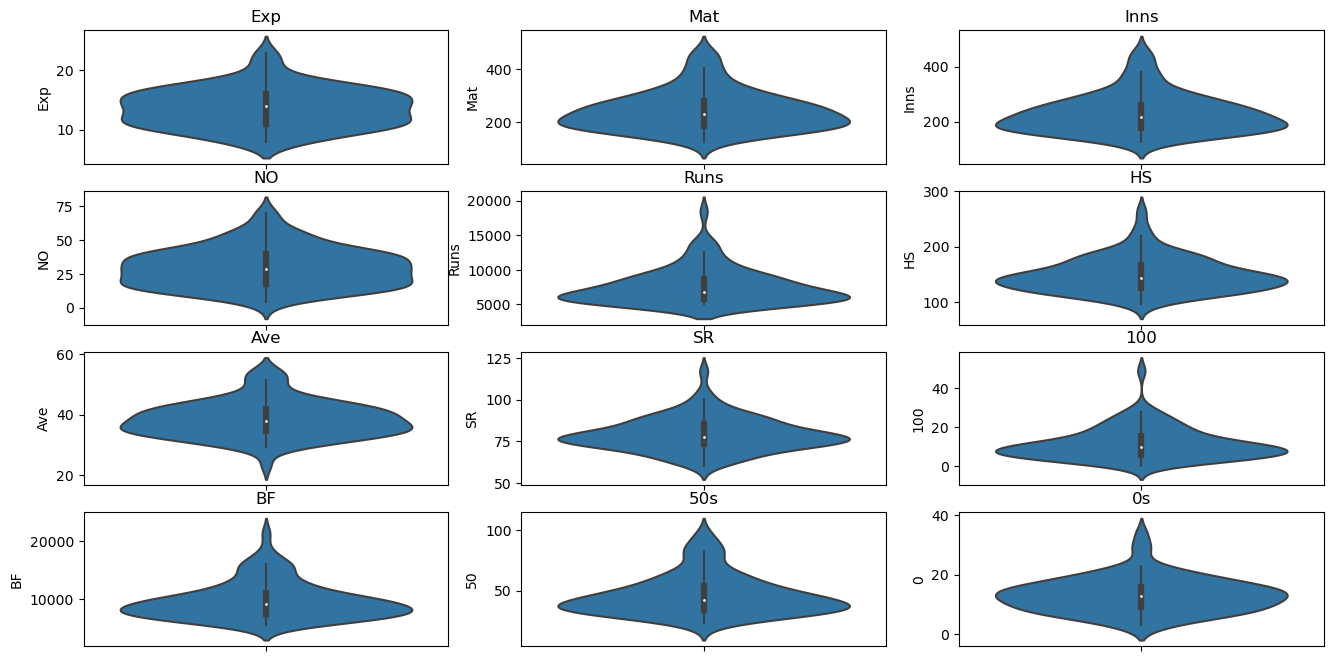

In [90]:
f, axes = plt.subplots(4,3, figsize=(16, 8))
s=sns.violinplot(y=df.Exp,ax=axes[0, 0])
axes[0, 0].set_title('Exp')
s=sns.violinplot(y=df.Mat,ax=axes[0, 1])
axes[0, 1].set_title('Mat')
s=sns.violinplot(y=df.Inns,ax=axes[0, 2])
axes[0, 2].set_title('Inns')

s=sns.violinplot(y=df.NO,ax=axes[1, 0])
axes[1, 0].set_title('NO')
s=sns.violinplot(y=df.Runs,ax=axes[1, 1])
axes[1, 1].set_title('Runs')
s=sns.violinplot(y=df.HS,ax=axes[1, 2])
axes[1, 2].set_title('HS')

s=sns.violinplot(y=df.Ave,ax=axes[2, 0])
axes[2, 0].set_title('Ave')
s=sns.violinplot(y=df.SR,ax=axes[2, 1])
axes[2, 1].set_title('SR')
s=sns.violinplot(y=df['100'],ax=axes[2, 2])
axes[2, 2].set_title('100')
s=sns.violinplot(y=df['BF'],ax=axes[3, 0])
axes[3, 0].set_title('BF')
s=sns.violinplot(y=df['50'],ax=axes[3, 1])
axes[3, 1].set_title('50s')
s=sns.violinplot(y=df['0'],ax=axes[3, 2])
axes[3, 2].set_title('0s')
plt.show()

In [91]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [92]:
# Player name is important for us to determine about the player
# For model, it is not important
# Just for having the original dataset with player column in it
# I will create a copy of the dataset and then will drop the player column
# Now we can fetch the copy of the dataset without player column into our model

In [93]:
df_drop = df.copy()
df_drop = df_drop.drop(['Player'], axis = 1)
# player = df_drop.drop(['Player'], axis=1)

In [94]:
df_drop

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...
74,128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [95]:
df

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16
75,Misbah-ul-Haq (PAK),162,149,31,5122,96,43.40,6945,73.75,0,42,6,13
76,PD Collingwood (ENG),197,181,37,5092,120,35.36,6614,76.98,5,26,7,10
77,A Symonds (AUS),198,161,33,5088,156,39.75,5504,92.44,6,30,15,11


In [96]:
df_drop.head()

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,463,452,41,18426,200,44.83,21367,86.23,49,96,20,23
1,404,380,41,14234,169,41.98,18048,78.86,25,93,15,15
2,375,365,39,13704,164,42.03,17046,80.39,30,82,20,17
3,445,433,18,13430,189,32.36,14725,91.20,28,68,34,22
4,448,418,39,12650,144,33.37,16020,78.96,19,77,28,17


In [97]:
df['NO'].max()

70

In [98]:
df.describe(include='all')

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
count,79,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
unique,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,SR Tendulkar (INDIA),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,245.075949,230.544304,30.037975,7618.139241,149.253165,38.523291,9684.455696,79.295316,11.556962,46.443038,13.253165,13.746835
std,NaN,74.211716,70.321022,14.421710,2551.873313,31.285070,5.919093,3193.835825,9.925307,8.092014,16.351701,5.925755,3.310699
min,NaN,128.000000,127.000000,4.000000,5080.000000,96.000000,23.570000,5504.000000,60.570000,0.000000,23.000000,3.000000,8.000000
25%,NaN,188.000000,177.000000,17.500000,5759.000000,125.500000,34.600000,7393.500000,73.725000,6.000000,34.500000,9.000000,11.000000
50%,NaN,232.000000,217.000000,29.000000,6798.000000,144.000000,37.870000,9134.000000,77.730000,10.000000,42.000000,13.000000,14.000000
75%,NaN,281.500000,261.500000,40.000000,8739.500000,167.500000,41.845000,10976.000000,85.180000,15.500000,54.000000,16.000000,16.000000


In [99]:
df['NO'].min()

4

In [39]:
# The dataset which we have contains very much scattered values
# 17, 25, 50, 78
# range1 = 17-25
# range2 = 25-50

In [40]:
# Standardization --> Feature scaling process
# It will bring all the scattered values in some range
# Z-test --> x - mean/ sd
# mean = 0, std = 1


In [101]:
import sklearn
from sklearn.preprocessing import StandardScaler

In [102]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_drop) # We are fetching df_drop data for standardization
df_scaled

array([[ 2.95528204e+00,  3.16933340e+00,  7.64962749e-01,
         4.26232808e+00,  1.63244320e+00,  1.07229395e+00,
         3.68121424e+00,  7.03151526e-01,  4.65672622e+00,
         3.05005720e+00,  1.14583653e+00,  2.81278702e+00],
       [ 2.15517925e+00,  2.13891509e+00,  7.64962749e-01,
         2.60911662e+00,  6.35223595e-01,  5.87724608e-01,
         2.63538469e+00, -4.41394951e-02,  1.67188751e+00,
         2.86541772e+00,  2.96670622e-01,  3.80938324e-01],
       [ 1.76190839e+00,  1.92424461e+00,  6.25396797e-01,
         2.40009894e+00,  4.74381724e-01,  5.96225824e-01,
         2.31965067e+00,  1.10996904e-01,  2.29372891e+00,
         2.18840630e+00,  1.14583653e+00,  9.88900497e-01],
       [ 2.71118288e+00,  2.89741746e+00, -8.40045698e-01,
         2.29204075e+00,  1.27859108e+00, -1.04790945e+00,
         1.58829472e+00,  1.20709133e+00,  2.04499235e+00,
         1.32675540e+00,  3.52350108e+00,  2.50880593e+00],
       [ 2.75186607e+00,  2.68274698e+00,  6.2539679

In [103]:
df_df1 = pd.DataFrame(df_scaled, columns = [ 'Mat', 'Inns', 'NO', 'Runs', 'HS', 'Ave', 'BF', 'SR', '100',
                                            '50', '0', 'Exp'])
df_df1.head() # It will label the unlabelled data 

,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp
0,2.955282,3.169333,0.764963,4.262328,1.632443,1.072294,3.681214,0.703152,4.656726,3.050057,1.145837,2.812787
1,2.155179,2.138915,0.764963,2.609117,0.635224,0.587725,2.635385,-0.044139,1.671888,2.865418,0.296671,0.380938
2,1.761908,1.924245,0.625397,2.400099,0.474382,0.596226,2.319651,0.110997,2.293729,2.188406,1.145837,0.988900
3,2.711183,2.897417,-0.840046,2.292041,1.278591,-1.047909,1.588295,1.207091,2.044992,1.326755,3.523501,2.508806
4,2.751866,2.682747,0.625397,1.984430,-0.168986,-0.876185,1.996354,-0.034000,0.925678,1.880674,2.504502,0.988900


In [44]:
# Whenever we want to perform clustering, then always remember that we should not fetch the data
# which is very much scattered to KMeans model.

### Implementing KMeans

In [104]:
from sklearn.cluster import KMeans

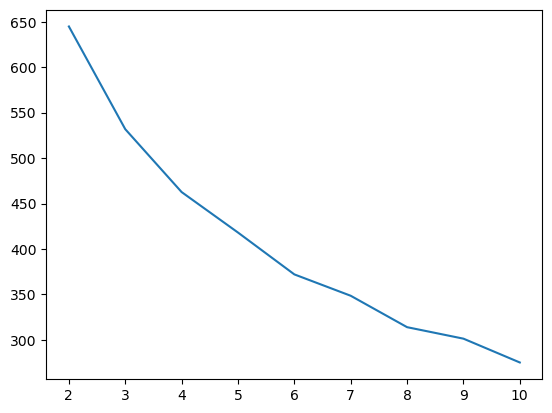

In [105]:
clusters=list(range(2,11)) # 2,3,4,5,6,7,8,9,10
# The most feasible no. of clusters to provide is from 2 - 10
# Try and test
wcss = []
for i in clusters:  # for i in clusters
    model_clus = KMeans(n_clusters = i)
    model_clus.fit(df_df1)
    wcss.append(model_clus.inertia_) #Distance from the centroid with respect to data points

plt.plot(clusters,wcss);  # for plotting the elbow graph

In [106]:
# WCSS --> Within Cluster Sum of Squares
cluster = KMeans(n_clusters=4)
cluster.fit(df_df1)

KMeans(n_clusters=4)

In [107]:
df['Cluster_Id'] = cluster.labels_ # labels ( n = 4) --> 0,1,2,3
# 0 --> 1st cluster, 1 --> 2nd cluster, 2 --> 3rd cluster, 3 --> 4th cluster
df.head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
3,ST Jayasuriya (Asia/SL),445,433,18,13430,189,32.36,14725,91.20,28,68,34,22,1
4,DPMD Jayawardene (Asia/SL),448,418,39,12650,144,33.37,16020,78.96,19,77,28,17,1


In [49]:
df.tail()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
74,CG Greenidge (WI),142.04,139.48,13.0,5134.00,133.00,45.03,7908.00,64.92,11.00,31.00,3.0,16.0,2
75,Misbah-ul-Haq (PAK),162.00,149.00,31.0,5122.00,100.68,43.40,6945.00,73.75,1.56,42.00,6.0,13.0,2
76,PD Collingwood (ENG),197.00,181.00,37.0,5092.00,120.00,35.36,6614.00,76.98,5.00,26.00,7.0,10.0,2
77,A Symonds (AUS),198.00,161.00,33.0,5088.00,156.00,39.75,5842.52,92.44,6.00,30.00,15.0,11.0,2
78,Abdul Razzaq (Asia/PAK),265.00,228.00,57.0,5086.24,112.00,29.70,6252.00,81.25,3.00,25.34,14.0,15.0,3


In [50]:
# ICC --> Lowest NO, Highest Average, Highest Strike Rate
# For finding the best player in each and every cluster

In [108]:
df[df['Cluster_Id']==0].sort_values(by = ['Ave','NO','SR'], ascending = [False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
38,MG Bevan (AUS),232,196,67,6912,108,53.58,9320,74.16,6,46,5,10,0
64,MEK Hussey (AUS),185,157,44,5442,109,48.15,6243,87.16,3,39,3,8,0
74,CG Greenidge (WI),128,127,13,5134,133,45.03,7908,64.92,11,31,3,16,0
51,DM Jones (AUS),164,161,25,6068,145,44.61,8362,72.56,7,46,6,10,0
46,LRPL Taylor (NZ),190,176,29,6486,131,44.12,7906,82.03,17,37,9,11,0


In [109]:
df[df['Cluster_Id']==1].sort_values(by = ['Ave','NO','SR'], ascending = [False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
0,SR Tendulkar (INDIA),463,452,41,18426,200,44.83,21367,86.23,49,96,20,23,1
6,JH Kallis (Afr/ICC/SA),328,314,53,11579,139,44.36,15885,72.89,17,86,17,18,1
2,RT Ponting (AUS/ICC),375,365,39,13704,164,42.03,17046,80.39,30,82,20,17,1
1,KC Sangakkara (Asia/ICC/SL),404,380,41,14234,169,41.98,18048,78.86,25,93,15,15,1
7,SC Ganguly (Asia/INDIA),311,300,23,11363,183,41.02,15416,73.70,22,72,16,15,1


In [110]:
df[df['Cluster_Id']==2].sort_values(by = ['Ave','NO','SR'], ascending = [False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
25,V Kohli (INDIA),188,180,29,8146,183,53.94,8952,90.99,27,43,11,9,2
15,AB de Villiers (Afr/SA),222,213,39,9319,162,53.55,9295,100.25,24,53,7,12,2
34,HM Amla (SA),156,153,10,7186,159,50.25,8069,89.05,25,33,3,9,2
42,IVA Richards (WI),187,167,24,6721,189,47.00,7451,90.20,11,45,7,16,2
49,ML Hayden (AUS/ICC),161,155,15,6133,181,43.80,7767,78.96,10,36,9,15,2


In [111]:
df[df['Cluster_Id']==3].sort_values(by = ['Ave','NO','SR'], ascending = [False,True,False]).head()

,Player,Mat,Inns,NO,Runs,HS,Ave,BF,SR,100,50,0,Exp,Cluster_Id
13,MS Dhoni (Asia/INDIA),295,255,70,9496,183,51.32,10706,88.69,10,64,8,13,3
29,MJ Clarke (AUS),245,223,44,7981,130,44.58,10104,78.98,8,58,10,12,3
11,Mohammad Yousuf (Asia/PAK),288,273,40,9720,141,41.71,12942,75.10,15,64,15,12,3
32,Javed Miandad (PAK),233,218,41,7381,119,41.70,11014,67.01,8,50,8,21,3
19,S Chanderpaul (WI),268,251,40,8778,150,41.60,12408,70.74,11,59,6,17,3


In [112]:
df[df['Cluster_Id']==0].shape

(31, 14)

In [113]:
df[df['Cluster_Id']==1].shape

(10, 14)

In [114]:
df[df['Cluster_Id']==2].shape

(15, 14)

In [115]:
df[df['Cluster_Id']==3].shape

(23, 14)

In [59]:
a = 10
b = 10
a==b

True

In [61]:
labels = cluster.labels_

In [62]:
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3,
       3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 2, 2, 2, 0, 2, 3, 0, 3,
       3, 3, 2, 2, 0, 0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3])